#### Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'CC GENERAL.csv')

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
null_df = df.isnull().sum()
print(null_df)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [9]:
df.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

In [10]:
#Drop rows with any missing values
df = df.dropna()

#Check missing values after dropping
print("\nMissing values after:")
print(df.isnull().sum())

#Show resulting shape
print(f"\nOriginal shape: {df.shape}")


Missing values after:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Original shape: (8636, 18)


Drop Non-Informative Column


In [11]:
df = df.drop('CUST_ID', axis=1)


Explore Feature Correlations

Visualize Distributions & Outliers

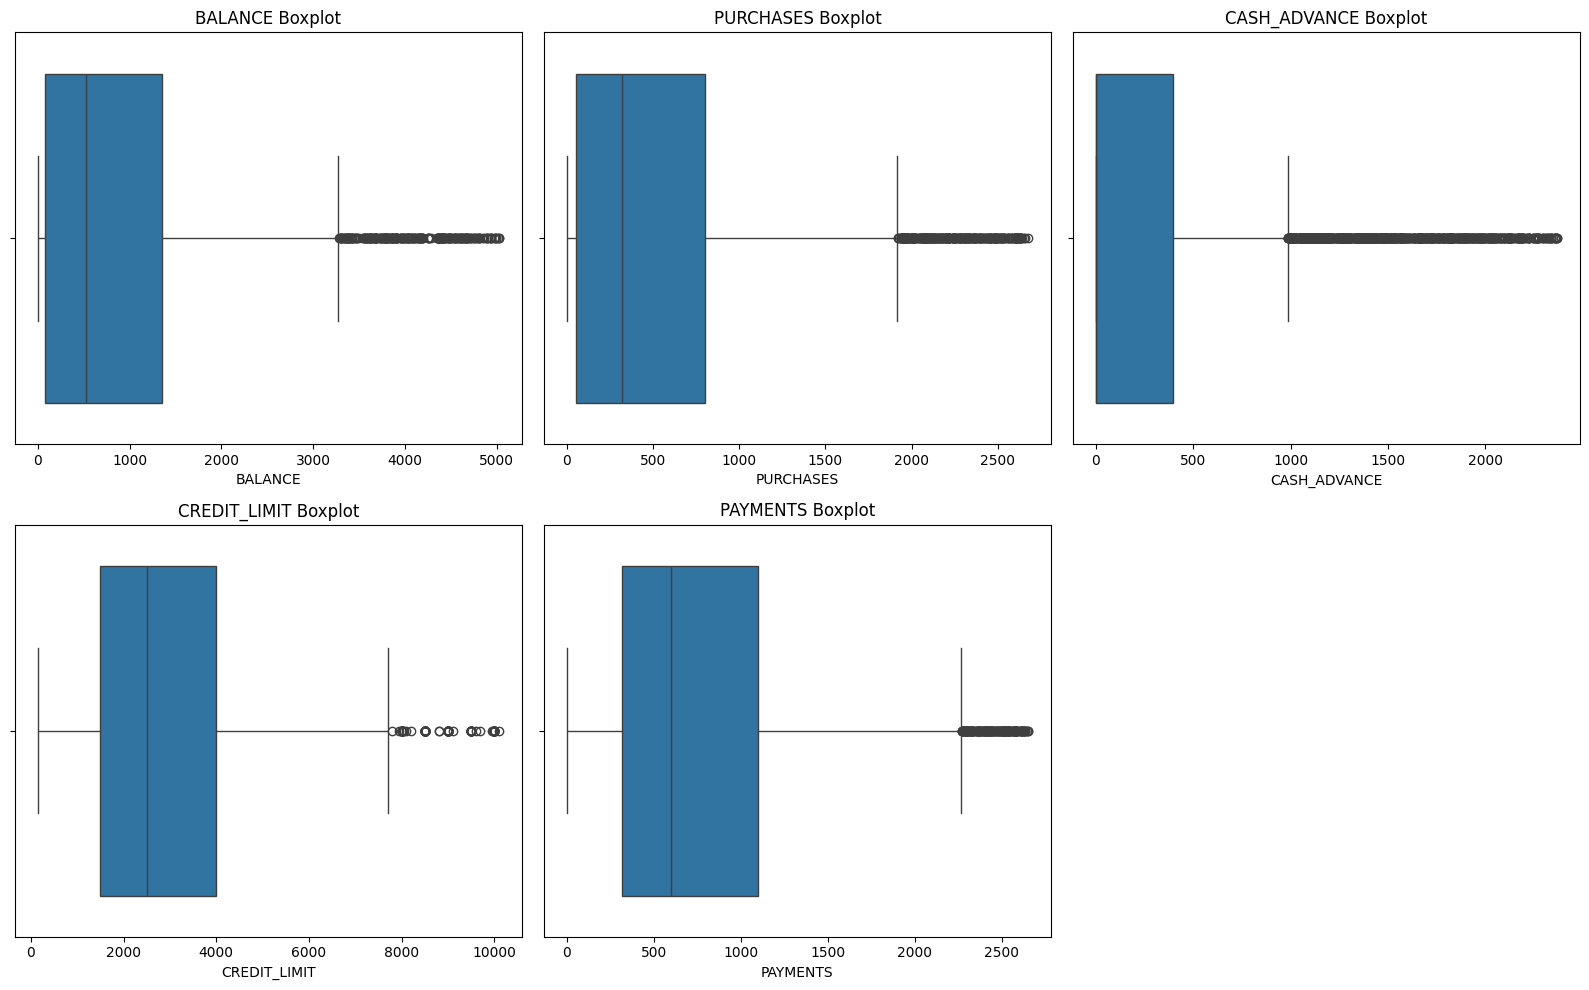

In [38]:
#Boxplots for selected features
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(16, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


Removing outliers

In [39]:
def remove_outliers_iqr(df, columns, factor=1.5):
    """
    Remove outliers from multiple columns using the IQR method.
    
    Parameters:
        df (DataFrame): The input dataframe.
        columns (list): List of columns to check for outliers.
        factor (float): The IQR multiplier, default is 1.5 (standard).
    
    Returns:
        DataFrame: A copy of the dataframe with outliers removed.
    """
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df


In [40]:
#columns to remove outliers
columns_to_filter = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

# Apply the function
df = remove_outliers_iqr(df, columns=columns_to_filter)
print(f"After outlier removal: {df.shape}")


After outlier removal: (4270, 19)


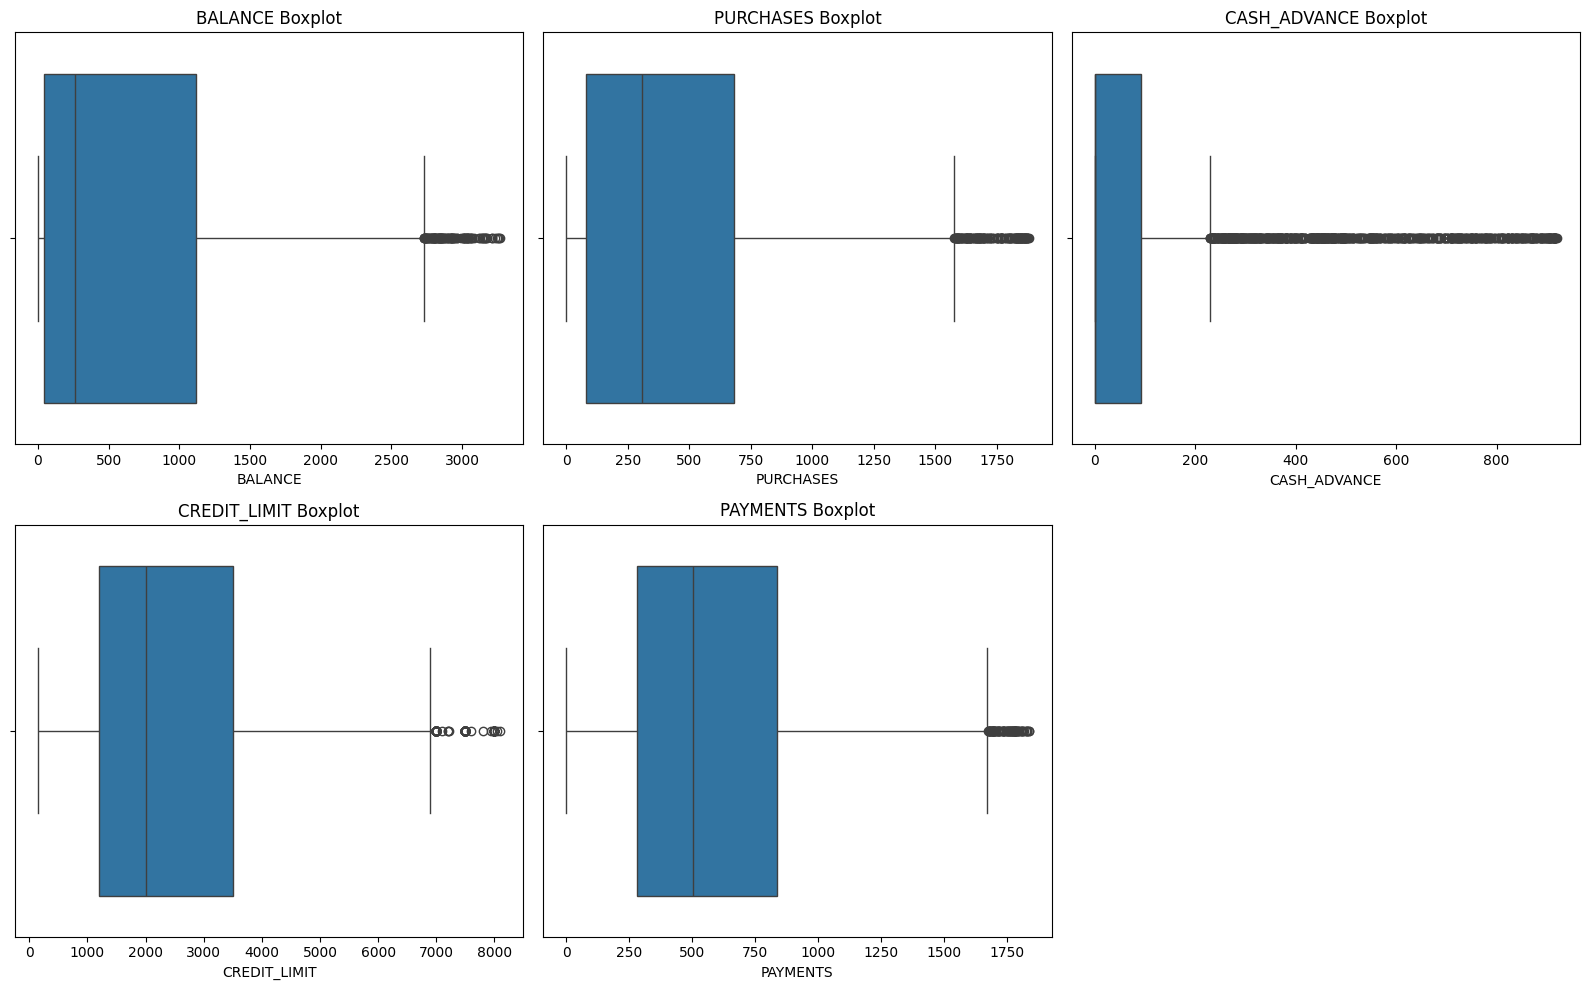

In [41]:
#Boxplots for selected features
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(16, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


Histograms (Distribution)

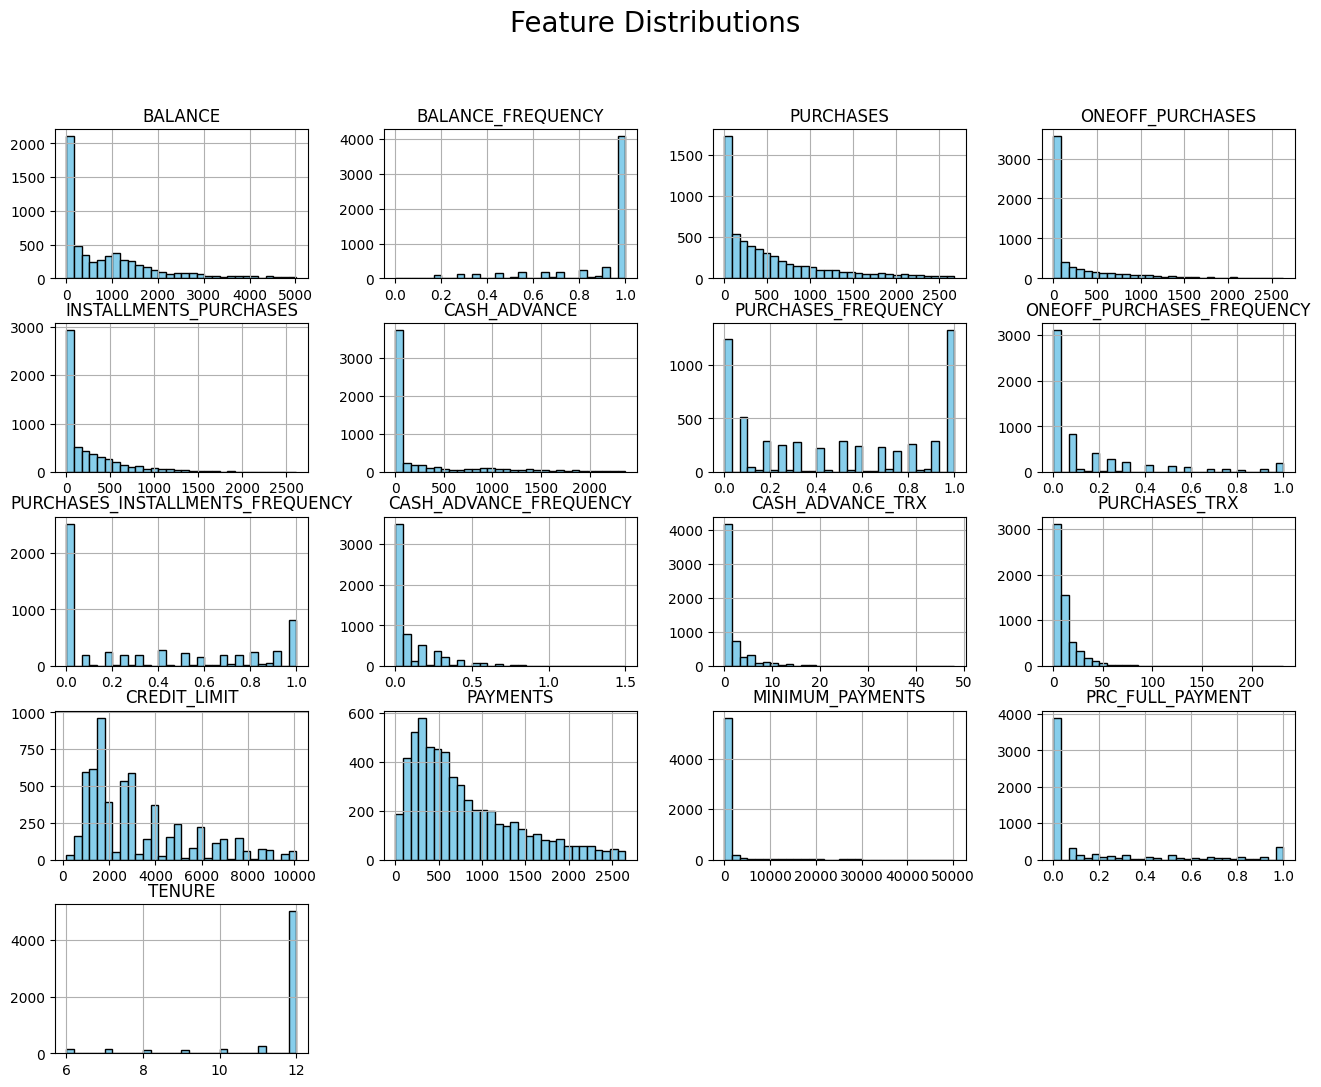

In [20]:

df.hist(bins=30, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Re-scale the current (filtered) DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

#Fit KMeans on the re-scaled, clean data
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

#Assign cluster labels to the cleaned df (this will now match lengths)
df['Cluster'] = cluster_labels

print(" Cluster labels successfully assigned.")


 Cluster labels successfully assigned.


Elbow Method (Find Optimal K)

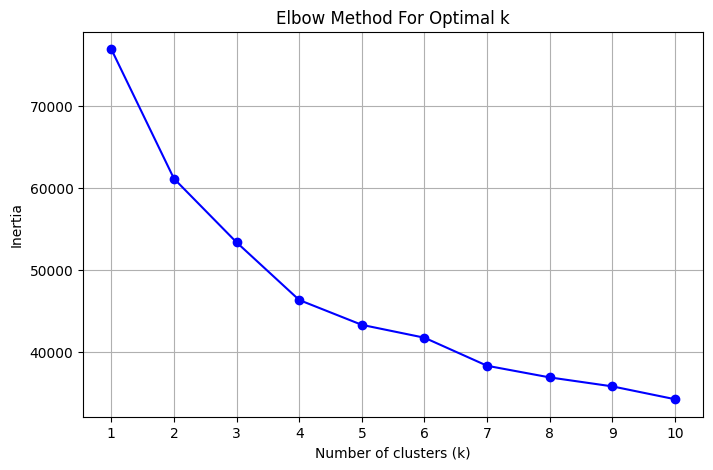

In [45]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Apply K-Means with Optimal k

In [46]:
#Fit KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

#Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels


Cluster Profiling – Average Values per Cluster

In [47]:
# Group by cluster and calculate mean
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)

# Round for readability
cluster_profile_rounded = cluster_profile.round(2)

# Display profile
print(cluster_profile_rounded)


         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0         410.09               0.92     621.82             60.85   
1         567.17               0.76     193.00            114.52   
2         791.64               0.94    1096.87            891.33   
3        1361.79               0.97     131.72             77.82   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                        561.58         25.11                 0.89   
1                         78.91         53.06                 0.22   
2                        205.54         49.94                 0.72   
3                         54.41        496.43                 0.16   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                       

PCA (Principal Component Analysis)

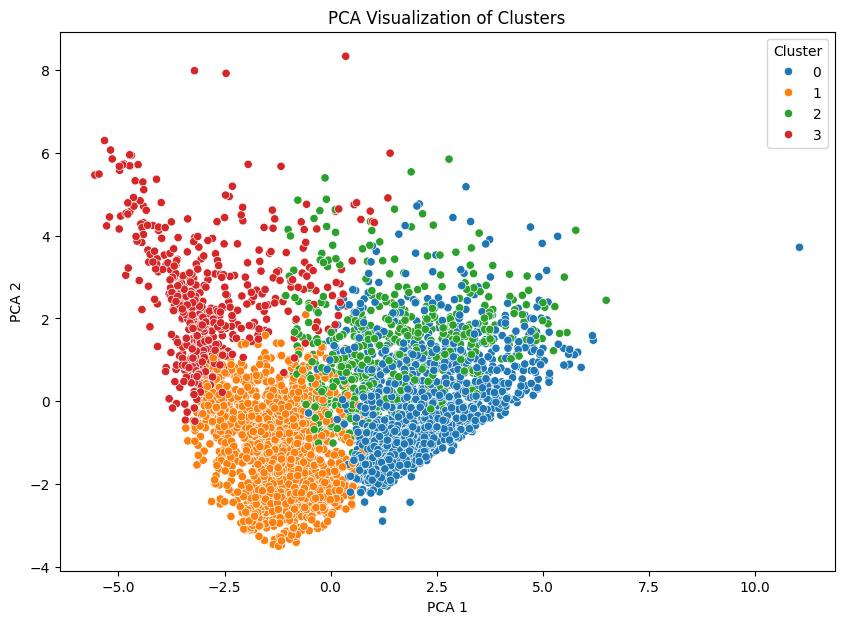

In [48]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='tab10')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


Formatted Cluster Profile Report



In [26]:
#Map numeric clusters to human-readable labels
cluster_labels_map = {
    0: "Inactive Users",
    1: "Cash Users",
    2: "High Spenders",
    3: "Revolvers"
}

# Create 'Segment' column using the cluster mapping
df['Segment'] = df['Cluster'].map(cluster_labels_map)


<Axes: >

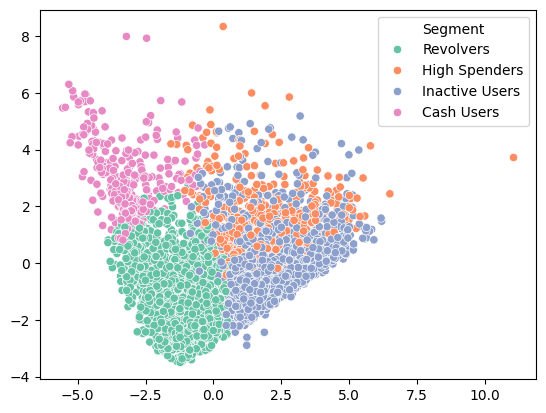

In [50]:
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Segment'], palette='Set2')


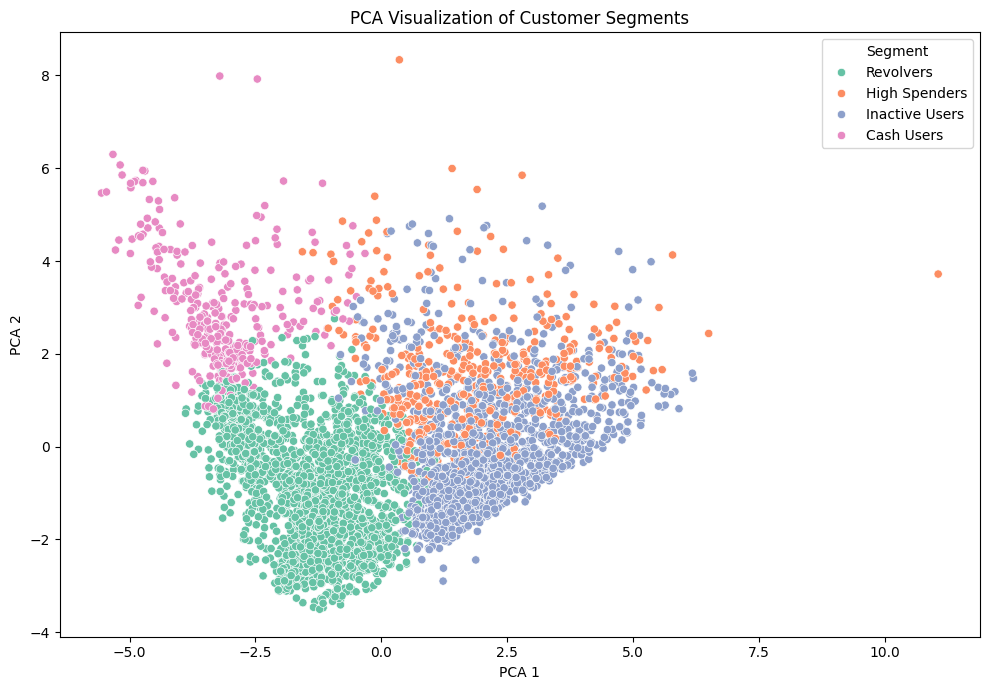

In [51]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Segment'], palette='Set2')
plt.title('PCA Visualization of Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [27]:
# Display average values per cluster
cluster_profile_rounded = df.groupby('Segment').mean(numeric_only=True).round(2)

# Transpose for better readability
report = cluster_profile_rounded.T

# Sort by largest differences between clusters (optional)
report['range'] = report.max(axis=1) - report.min(axis=1)
report = report.sort_values(by='range', ascending=False).drop(columns='range')

# Display the report
print("📋 Cluster Profile Report (averages per feature):")
display(report)


📋 Cluster Profile Report (averages per feature):


Segment,Cash Users,High Spenders,Inactive Users,Revolvers
CREDIT_LIMIT,3007.12,4624.34,2796.25,2745.17
PURCHASES,154.74,1445.98,699.06,216.79
BALANCE,1760.64,1090.76,501.71,647.36
CASH_ADVANCE,1162.01,145.27,71.35,131.11
ONEOFF_PURCHASES,94.46,1080.05,67.44,146.65
PAYMENTS,878.89,1278.59,752.08,534.67
INSTALLMENTS_PURCHASES,60.28,365.93,632.34,70.47
MINIMUM_PAYMENTS,814.71,526.27,695.44,436.83
PURCHASES_TRX,2.96,24.20,16.84,3.24
CASH_ADVANCE_TRX,6.73,0.73,0.35,0.66


Export Final Segmented Dataset

In [28]:
# Save to CSV
df.to_csv('credit_card_customers_segmented.csv', index=False)
print(" Dataset exported as 'credit_card_customers_segmented.csv'")


 Dataset exported as 'credit_card_customers_segmented.csv'


Further Visualization: Cluster Heatmap

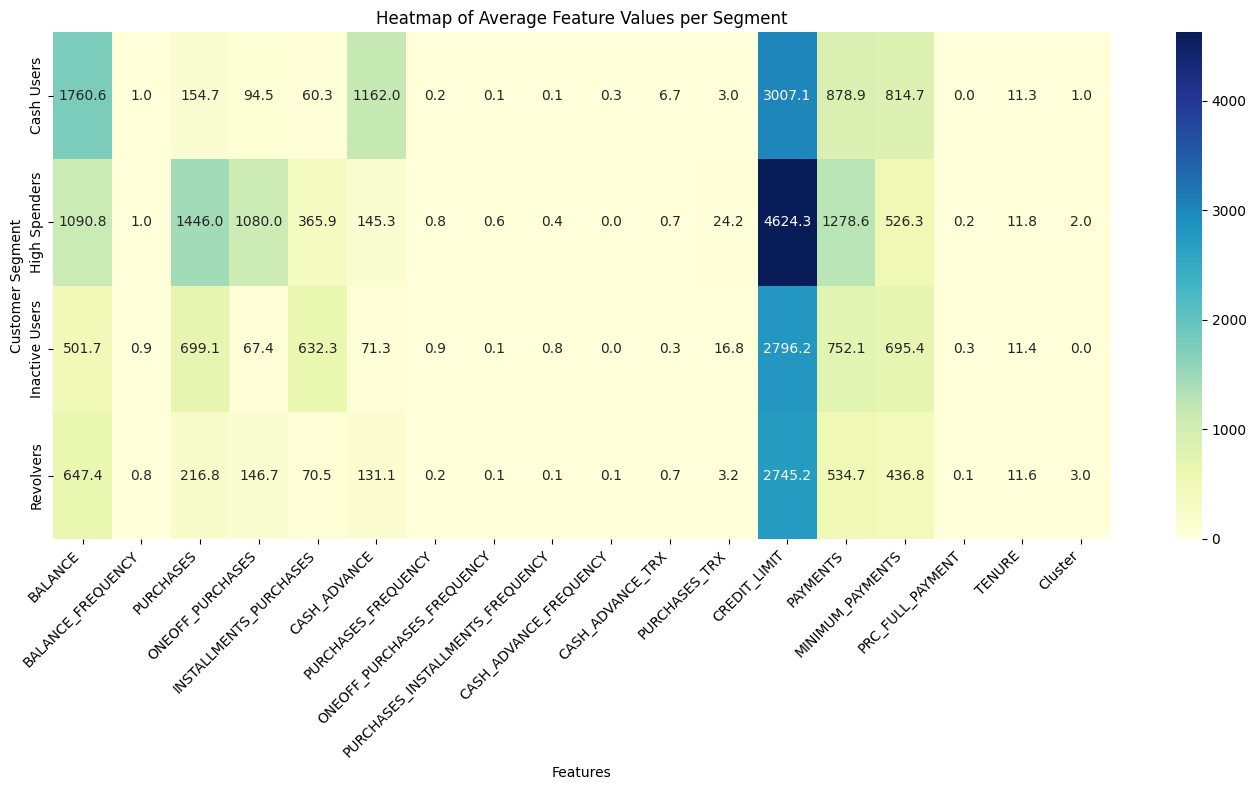

In [29]:
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_profile_rounded, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Heatmap of Average Feature Values per Segment')
plt.ylabel('Customer Segment')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Silhouette Score: Cluster Quality

In [30]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.177


Feature Importance for Clustering

In [31]:
# Standard deviation of means across segments (high variance = more discriminative)
feature_variances = df.groupby('Segment').mean(numeric_only=True).std()

# Sort by importance
important_features = feature_variances.sort_values(ascending=False)
print("📍 Approximate Feature Importance for Clustering:")
print(important_features)


📍 Approximate Feature Importance for Clustering:
CREDIT_LIMIT                        894.629351
PURCHASES                           596.434939
BALANCE                             565.524240
CASH_ADVANCE                        524.027083
ONEOFF_PURCHASES                    489.700905
PAYMENTS                            312.546434
INSTALLMENTS_PURCHASES              273.060752
MINIMUM_PAYMENTS                    169.242283
PURCHASES_TRX                        10.499304
CASH_ADVANCE_TRX                      3.081185
Cluster                               1.290994
PURCHASES_FREQUENCY                   0.379400
PURCHASES_INSTALLMENTS_FREQUENCY      0.346002
ONEOFF_PURCHASES_FREQUENCY            0.273632
TENURE                                0.203650
CASH_ADVANCE_FREQUENCY                0.143922
PRC_FULL_PAYMENT                      0.122965
BALANCE_FREQUENCY                     0.089500
dtype: float64


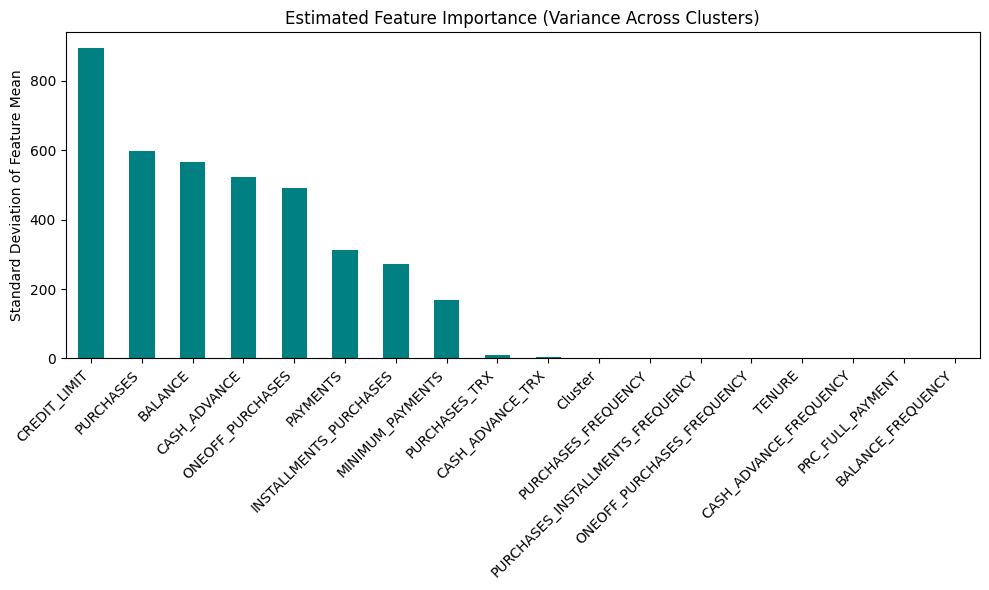

In [32]:
plt.figure(figsize=(10, 6))
important_features.plot(kind='bar', color='teal')
plt.title('Estimated Feature Importance (Variance Across Clusters)')
plt.ylabel('Standard Deviation of Feature Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Cluster Size Distribution (Bar Chart)

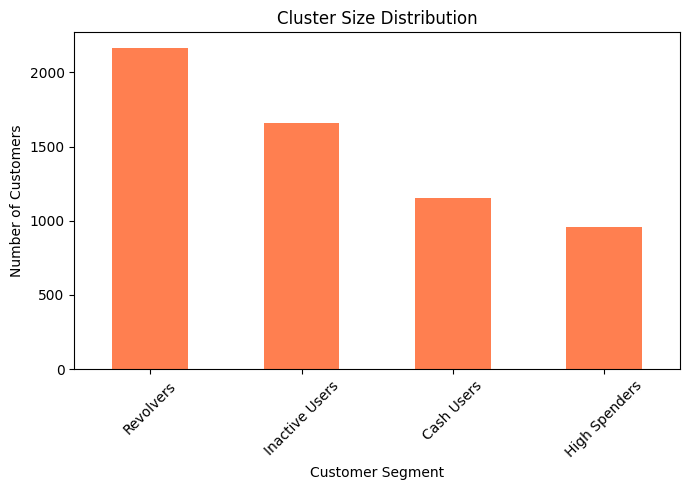

In [33]:
plt.figure(figsize=(7, 5))
df['Segment'].value_counts().plot(kind='bar', color='coral')
plt.title('Cluster Size Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("KMeans model and scaler saved for reuse.")


KMeans model and scaler saved for reuse.


In [35]:
# Save the cluster profile report (the 'report' variable)
report.to_csv('cluster_profile_report.csv')
print("Cluster profile report saved as cluster_profile_report.csv")

plt.savefig('pca_clusters.png')

plt.savefig('cluster_heatmap.png')

Cluster profile report saved as cluster_profile_report.csv


<Figure size 640x480 with 0 Axes>